In [1]:
import pandas as pd

data = {
    'Date': [26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7],
    'Day': ['Monday', 'Monday', 'Monday', 'Monday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Friday', 'Friday', 'Friday', 'Friday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Monday', 'Monday', 'Monday', 'Monday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Friday', 'Friday', 'Friday', 'Friday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Sunday', 'Sunday', 'Sunday', 'Sunday'],
    'Holiday': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'Meal': ['Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner', 'Breakast', 'Lunch', 'Tea', 'Dinner'],
    'Time': [13.9, 17, 5.9, 20.2, 14.2, 20, 6, 18.2, 12, 23, 6.5, 20.9, 15, 17.9, 5, 18, 18, 20, 6.2, 19.9, 13.3, 19, 7, 22, 15, 20, 8, 22, 13, 15, 6, 21, 15, 20, 6, 21, 18.3, 17.5, 5.3, 19.9, 13.3, 18.2, 6.2, 21.2, 15.2, 18, 7, 21],
}

df = pd.DataFrame(data)


<ipython-input-2-06ce5cf98b39>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day', y='Time', hue='Meal', data=df, ci=None)


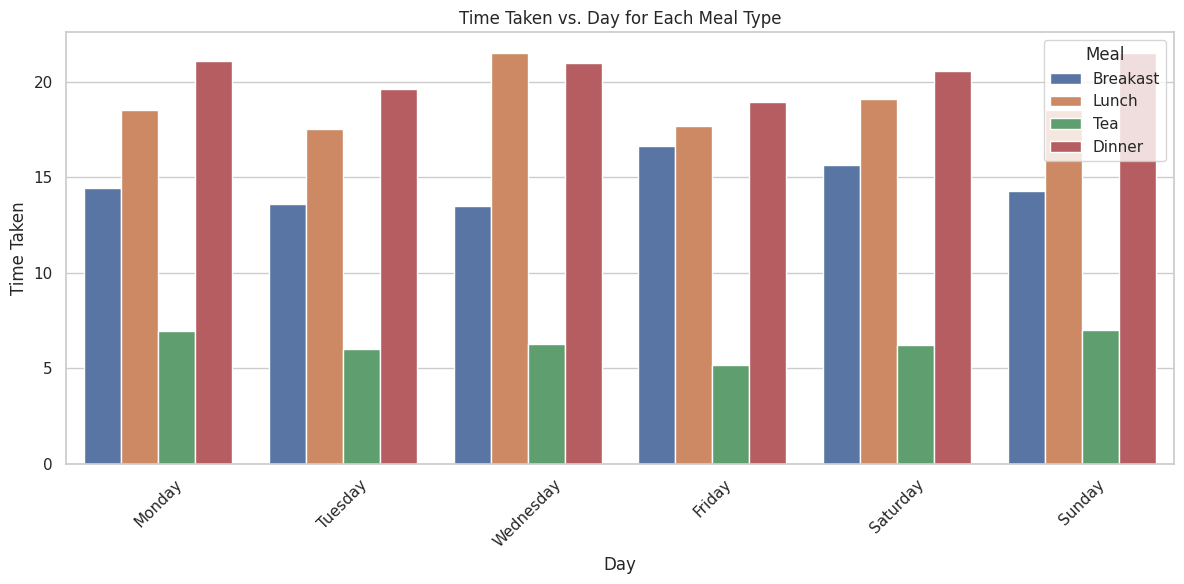

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Day', y='Time', hue='Meal', data=df, ci=None)
plt.title('Time Taken vs. Day for Each Meal Type')
plt.xlabel('Day')
plt.ylabel('Time Taken')
plt.xticks(rotation=45)
plt.legend(title='Meal')
plt.tight_layout()
plt.show()


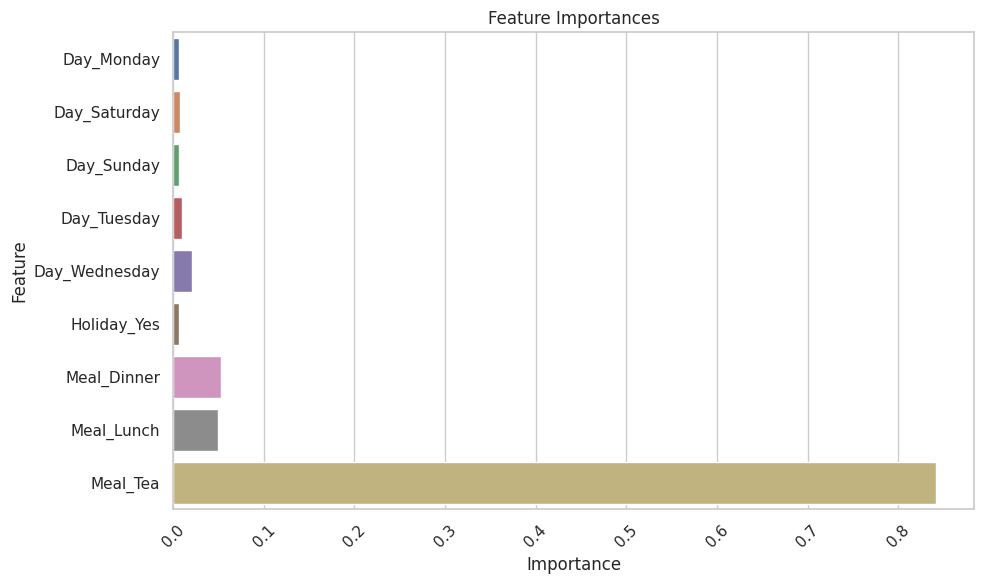

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming you already have it loaded into a DataFrame df)

# Split the data into training (80%) and testing (20%) sets
X = df[['Day', 'Holiday', 'Meal']]  # Features
y = df['Time']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concatenate the training and test data to ensure consistent one-hot encoding
X_combined = pd.concat([X_train, X_test])

# Encode categorical variables (Day, Holiday, Meal) using one-hot encoding
X_combined_encoded = pd.get_dummies(X_combined, columns=['Day', 'Holiday', 'Meal'], drop_first=True)

# Split the combined dataset back into training and test sets
X_train_encoded = X_combined_encoded.iloc[:len(X_train)]
X_test_encoded = X_combined_encoded.iloc[len(X_train):]

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_encoded, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test_encoded)

# Analyze feature importances
feature_importances = rf_regressor.feature_importances_

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X_train_encoded.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze the importance of features and decide which parameter(s) are important for prediction


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Assuming you have already prepared the data as X_test_encoded and y_test


# Predict with the Random Forest Regressor
y_pred_rf = rf_regressor.predict(X_test_encoded)


# Calculate evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


# Create and train a Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_encoded, y_train)


# Predict with Linear Regression
y_pred_linear = linear_regressor.predict(X_test_encoded)


# Calculate evaluation metrics for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


# Compare the results
print("Random Forest Regression Metrics:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")


print("\nLinear Regression Metrics:")
print(f"MAE: {mae_linear:.2f}")
print(f"MSE: {mse_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")

Random Forest Regression Metrics:
MAE: 1.41
MSE: 3.58
R-squared: 0.79

Linear Regression Metrics:
MAE: 1.04
MSE: 1.52
R-squared: 0.91
